<a href="https://colab.research.google.com/github/git-kmoraes/CC7711-IA/blob/main/LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caloria (1000Kcal): 2
Peso (10kg): 6
Tempo de atividade fisica (1h): 1
Caloria: 2000.00 Kcal
Peso: 60.00 Kg
Tempo de atividade física: 60.00 m
Obesidade: 4.82


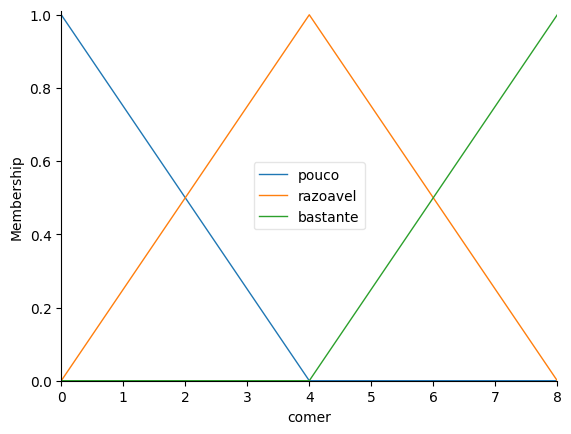

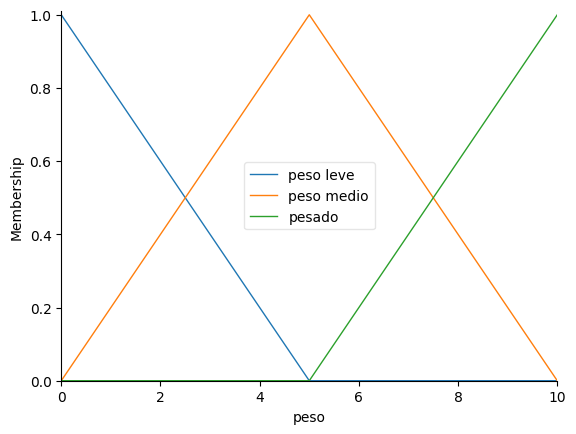

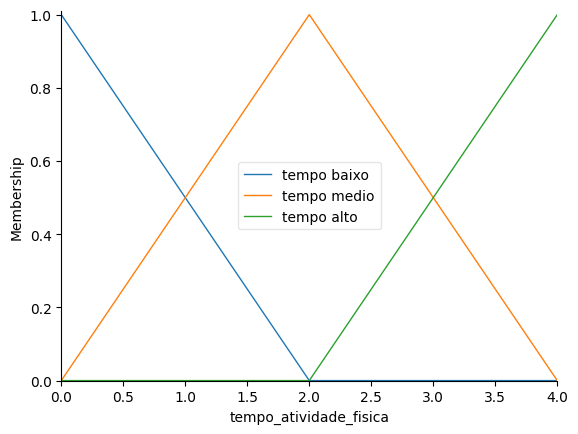

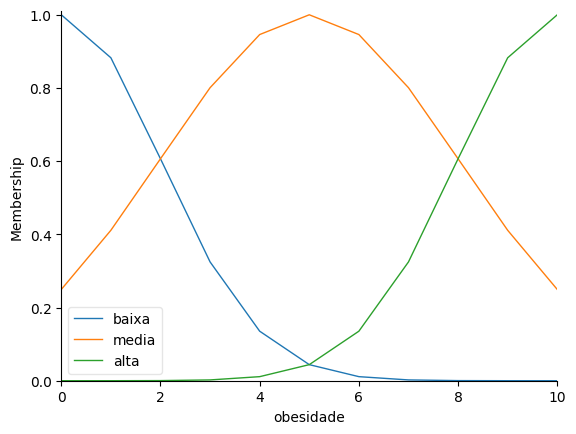

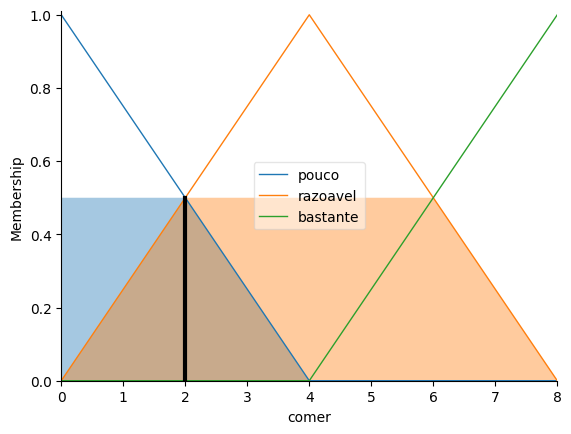

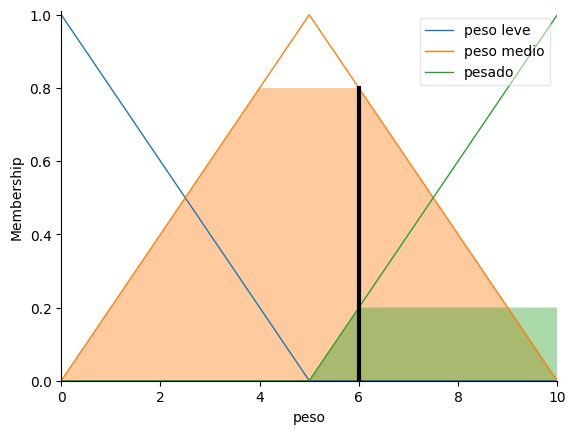

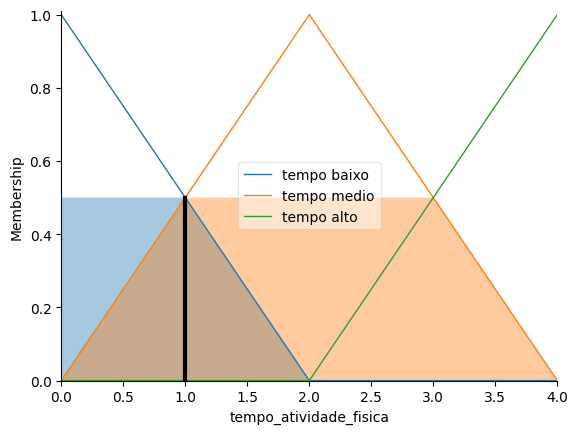

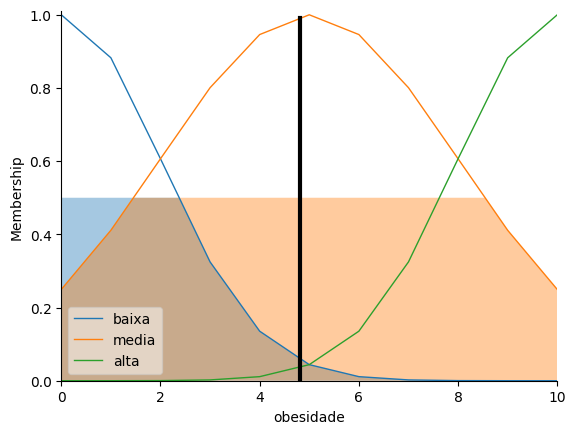

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Variaveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 9, 1), 'comer')
peso = ctrl.Antecedent(np.arange(0, 11, 1), 'peso')
tempo_atividade_fisica = ctrl.Antecedent(np.arange(0, 5, 1), 'tempo_atividade_fisica')

# Variaveis de saída (Consequent)
obesidade = ctrl.Consequent(np.arange(0, 11, 1), 'obesidade')

# automf -> Atribuição de categorias automaticamente
comer.automf(names=['pouco', 'razoavel', 'bastante'], )
peso.automf(names=['peso leve', 'peso medio', 'pesado'])
tempo_atividade_fisica.automf(names=['tempo baixo', 'tempo medio', 'tempo alto'])

# sem automf -> Função de pertinência:
'''
# Triangular
obesidade['baixa'] = fuzz.trimf(obesidade.universe, [0, 0, 5])
obesidade['media'] = fuzz.trimf(obesidade.universe, [0, 5, 10])
obesidade['alta'] = fuzz.trimf(obesidade.universe, [5, 10, 10])

# Trapezoidal
obesidade['baixa'] = fuzz.trapmf(obesidade.universe, [0, 0, 2, 5])
obesidade['media'] = fuzz.trapmf(obesidade.universe, [2, 2.5, 7.5, 8])
obesidade['alta'] = fuzz.trapmf(obesidade.universe, [5, 8, 10, 10])
'''
# Gaussiana
obesidade['baixa'] = fuzz.gaussmf(obesidade.universe, 0, 2)
obesidade['media'] = fuzz.gaussmf(obesidade.universe, 5, 3)
obesidade['alta'] = fuzz.gaussmf(obesidade.universe, 10, 2)


# Visualizando as variáveis
comer.view()
peso.view()
tempo_atividade_fisica.view()
obesidade.view()

# Criando as regras
regra_1 = ctrl.Rule(comer['bastante'], obesidade['alta'])
regra_2 = ctrl.Rule(comer['razoavel'], obesidade['media'])
regra_3 = ctrl.Rule(peso['peso leve'], obesidade['baixa'])
regra_4 = ctrl.Rule(tempo_atividade_fisica['tempo baixo'] & comer['bastante'], obesidade['alta'])
regra_5 = ctrl.Rule(tempo_atividade_fisica['tempo medio'] & comer['razoavel'], obesidade['media'])
regra_6 = ctrl.Rule(tempo_atividade_fisica['tempo alto'] & peso['peso leve'], obesidade['baixa'])
regra_7 = ctrl.Rule(peso['peso medio'] & tempo_atividade_fisica['tempo alto'], obesidade['alta'])
regra_8 = ctrl.Rule(comer['pouco'] & tempo_atividade_fisica['tempo alto'], obesidade['media'])
regra_9 = ctrl.Rule(comer['pouco'] & tempo_atividade_fisica['tempo baixo'], obesidade['baixa'])
regra_10 = ctrl.Rule(comer['bastante'] & tempo_atividade_fisica['tempo baixo'], obesidade['media'])
regra_11 = ctrl.Rule(peso['peso leve'] & tempo_atividade_fisica['tempo medio'], obesidade['baixa'])
regra_12 = ctrl.Rule(peso['pesado'] & tempo_atividade_fisica['tempo alto'], obesidade['alta'])

controlador = ctrl.ControlSystem([
    regra_1, regra_2, regra_3, regra_4, regra_5, regra_6,
    regra_7, regra_8, regra_9, regra_10, regra_11, regra_12
])

# Simulando
calculo_obesidade = ctrl.ControlSystemSimulation(controlador)

qte_kcal = float(input('Caloria (1000Kcal): '))
qte_kg = float(input('Peso (10kg): '))
temp_atv_fisica = float(input('Tempo de atividade fisica (1h): '))
calculo_obesidade.input['comer'] = qte_kcal
calculo_obesidade.input['peso'] = qte_kg
calculo_obesidade.input['tempo_atividade_fisica'] = temp_atv_fisica
calculo_obesidade.compute()

valor_obesidade = calculo_obesidade.output['obesidade']

print(
    f"Caloria: {qte_kcal * 1000:.2f} Kcal\n"
    f"Peso: {qte_kg * 10:.2f} Kg\n"
    f"Tempo de atividade física: {temp_atv_fisica * 60:.2f} m\n"
    f"Obesidade: {valor_obesidade:.2f}"
)

comer.view(sim=calculo_obesidade)
peso.view(sim=calculo_obesidade)
tempo_atividade_fisica.view(sim=calculo_obesidade)
obesidade.view(sim=calculo_obesidade)

plt.show()

Caloria (1000Kcal): 2
Peso (10kg): 6
Tempo de atividade fisica (1h): 1
Caloria: 2000.00 Kcal
Peso: 60.00 Kg
Tempo de atividade física: 60.00 m
Obesidade: 4.40


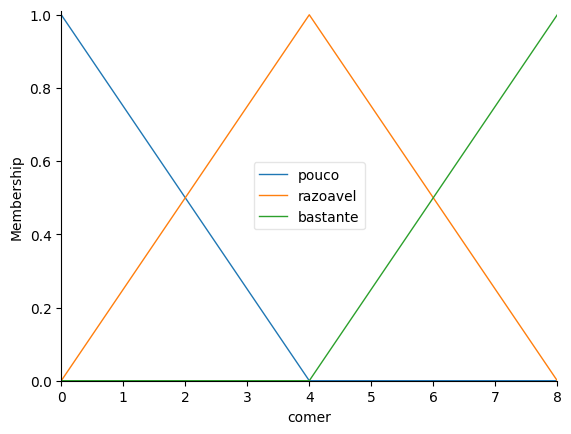

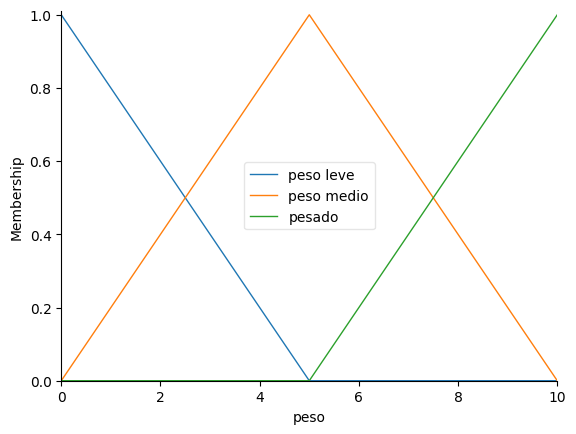

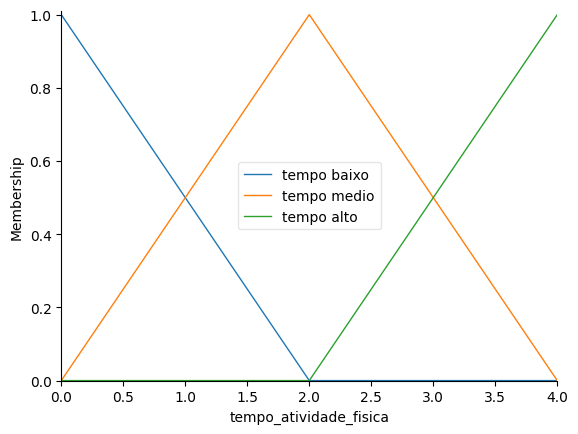

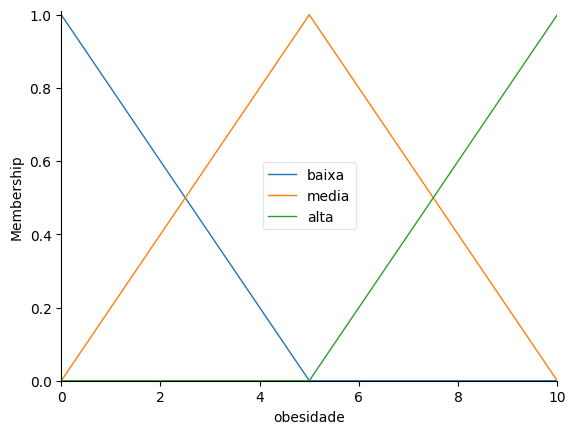

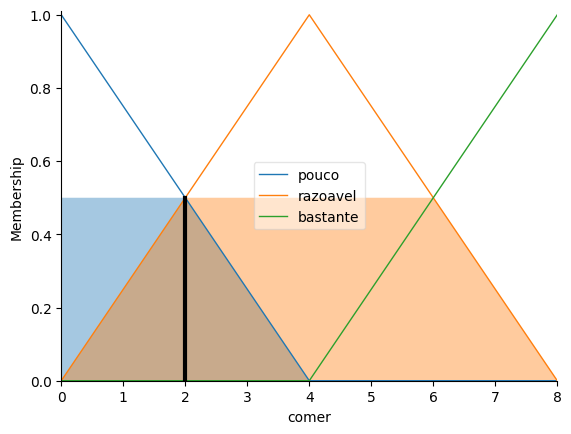

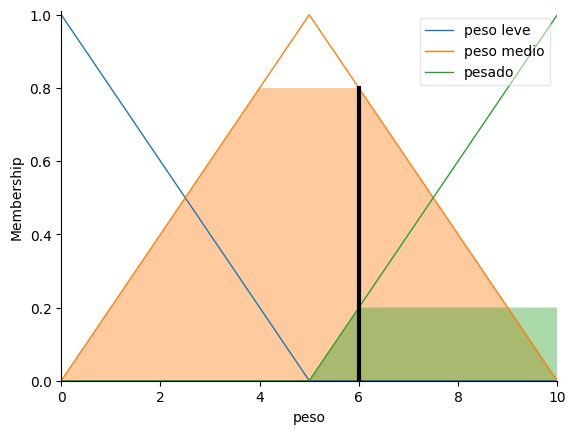

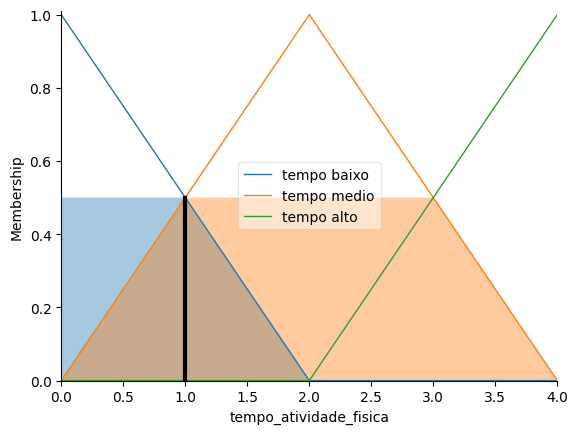

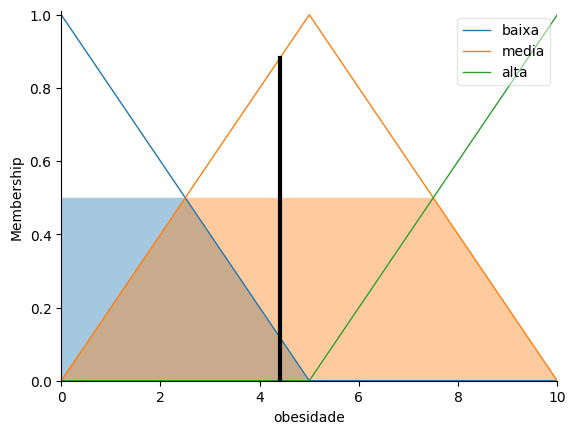

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Variaveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 9, 1), 'comer')
peso = ctrl.Antecedent(np.arange(0, 11, 1), 'peso')
tempo_atividade_fisica = ctrl.Antecedent(np.arange(0, 5, 1), 'tempo_atividade_fisica')

# Variaveis de saída (Consequent)
obesidade = ctrl.Consequent(np.arange(0, 11, 1), 'obesidade')

# automf -> Atribuição de categorias automaticamente
comer.automf(names=['pouco', 'razoavel', 'bastante'], )
peso.automf(names=['peso leve', 'peso medio', 'pesado'])
tempo_atividade_fisica.automf(names=['tempo baixo', 'tempo medio', 'tempo alto'])

# sem automf -> Função de pertinência:

# Triangular
obesidade['baixa'] = fuzz.trimf(obesidade.universe, [0, 0, 5])
obesidade['media'] = fuzz.trimf(obesidade.universe, [0, 5, 10])
obesidade['alta'] = fuzz.trimf(obesidade.universe, [5, 10, 10])
'''
# Trapezoidal
obesidade['baixa'] = fuzz.trapmf(obesidade.universe, [0, 0, 2, 5])
obesidade['media'] = fuzz.trapmf(obesidade.universe, [2, 2.5, 7.5, 8])
obesidade['alta'] = fuzz.trapmf(obesidade.universe, [5, 8, 10, 10])

# Gaussiana
obesidade['baixa'] = fuzz.gaussmf(obesidade.universe, 0, 2)
obesidade['media'] = fuzz.gaussmf(obesidade.universe, 5, 3)
obesidade['alta'] = fuzz.gaussmf(obesidade.universe, 10, 2)
'''

# Visualizando as variáveis
comer.view()
peso.view()
tempo_atividade_fisica.view()
obesidade.view()

# Criando as regras
regra_1 = ctrl.Rule(comer['bastante'], obesidade['alta'])
regra_2 = ctrl.Rule(comer['razoavel'], obesidade['media'])
regra_3 = ctrl.Rule(peso['peso leve'], obesidade['baixa'])
regra_4 = ctrl.Rule(tempo_atividade_fisica['tempo baixo'] & comer['bastante'], obesidade['alta'])
regra_5 = ctrl.Rule(tempo_atividade_fisica['tempo medio'] & comer['razoavel'], obesidade['media'])
regra_6 = ctrl.Rule(tempo_atividade_fisica['tempo alto'] & peso['peso leve'], obesidade['baixa'])
regra_7 = ctrl.Rule(peso['peso medio'] & tempo_atividade_fisica['tempo alto'], obesidade['alta'])
regra_8 = ctrl.Rule(comer['pouco'] & tempo_atividade_fisica['tempo alto'], obesidade['media'])
regra_9 = ctrl.Rule(comer['pouco'] & tempo_atividade_fisica['tempo baixo'], obesidade['baixa'])
regra_10 = ctrl.Rule(comer['bastante'] & tempo_atividade_fisica['tempo baixo'], obesidade['media'])
regra_11 = ctrl.Rule(peso['peso leve'] & tempo_atividade_fisica['tempo medio'], obesidade['baixa'])
regra_12 = ctrl.Rule(peso['pesado'] & tempo_atividade_fisica['tempo alto'], obesidade['alta'])

controlador = ctrl.ControlSystem([
    regra_1, regra_2, regra_3, regra_4, regra_5, regra_6,
    regra_7, regra_8, regra_9, regra_10, regra_11, regra_12
])

# Simulando
calculo_obesidade = ctrl.ControlSystemSimulation(controlador)

qte_kcal = float(input('Caloria (1000Kcal): '))
qte_kg = float(input('Peso (10kg): '))
temp_atv_fisica = float(input('Tempo de atividade fisica (1h): '))
calculo_obesidade.input['comer'] = qte_kcal
calculo_obesidade.input['peso'] = qte_kg
calculo_obesidade.input['tempo_atividade_fisica'] = temp_atv_fisica
calculo_obesidade.compute()

valor_obesidade = calculo_obesidade.output['obesidade']

print(
    f"Caloria: {qte_kcal * 1000:.2f} Kcal\n"
    f"Peso: {qte_kg * 10:.2f} Kg\n"
    f"Tempo de atividade física: {temp_atv_fisica * 60:.2f} m\n"
    f"Obesidade: {valor_obesidade:.2f}"
)

comer.view(sim=calculo_obesidade)
peso.view(sim=calculo_obesidade)
tempo_atividade_fisica.view(sim=calculo_obesidade)
obesidade.view(sim=calculo_obesidade)

plt.show()

Caloria (1000Kcal): 2
Peso (10kg): 6
Tempo de atividade fisica (1h): 1
Caloria: 2000.00 Kcal
Peso: 60.00 Kg
Tempo de atividade física: 60.00 m
Obesidade: 3.88


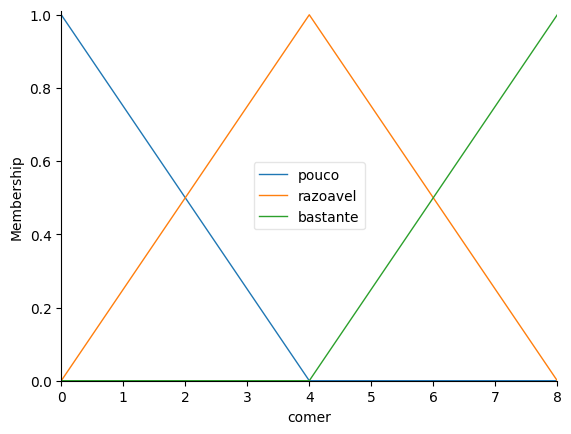

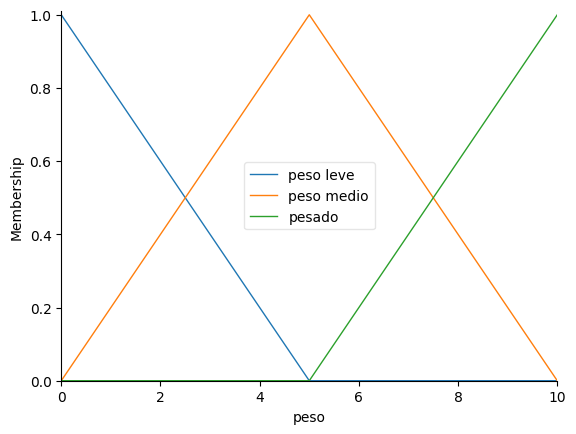

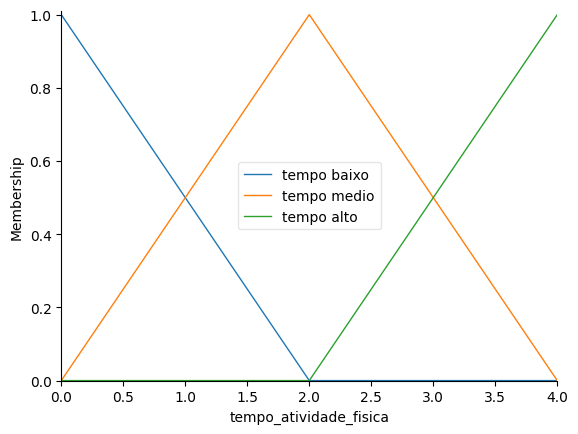

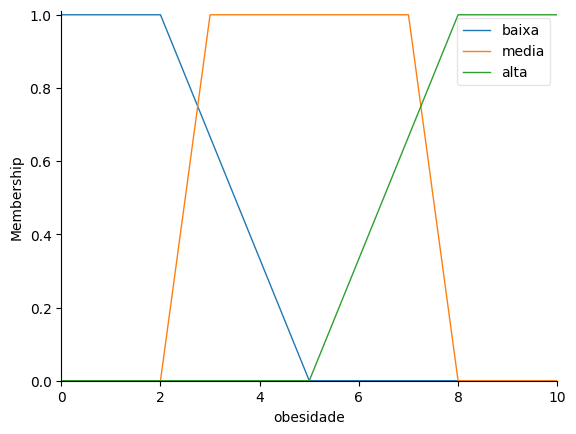

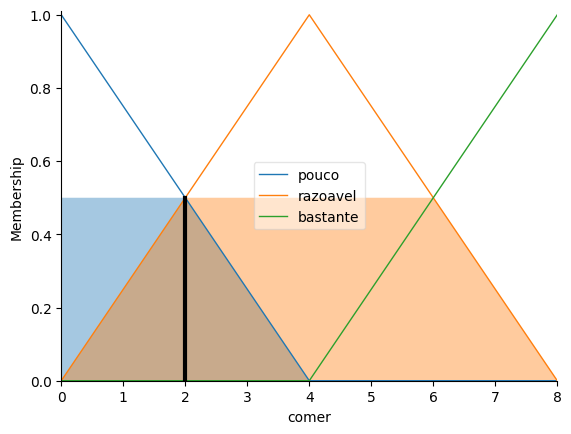

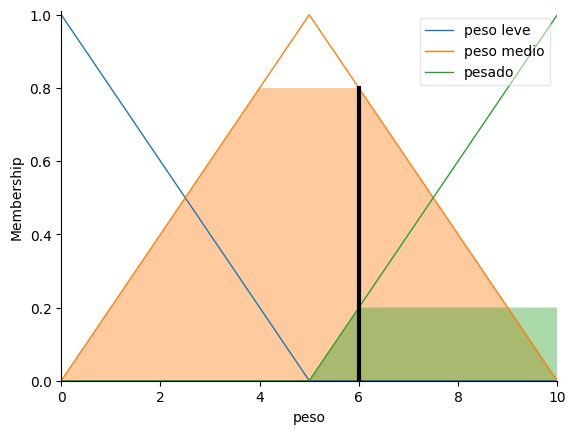

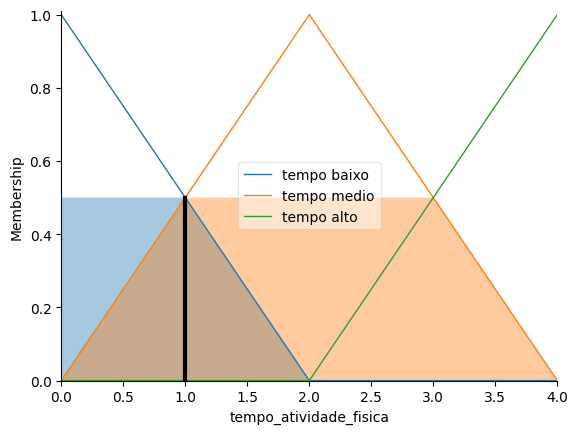

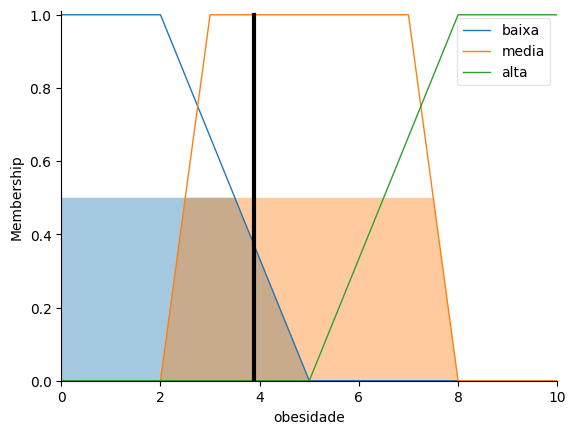

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Variaveis de Entrada (Antecedent)
comer = ctrl.Antecedent(np.arange(0, 9, 1), 'comer')
peso = ctrl.Antecedent(np.arange(0, 11, 1), 'peso')
tempo_atividade_fisica = ctrl.Antecedent(np.arange(0, 5, 1), 'tempo_atividade_fisica')

# Variaveis de saída (Consequent)
obesidade = ctrl.Consequent(np.arange(0, 11, 1), 'obesidade')

# automf -> Atribuição de categorias automaticamente
comer.automf(names=['pouco', 'razoavel', 'bastante'], )
peso.automf(names=['peso leve', 'peso medio', 'pesado'])
tempo_atividade_fisica.automf(names=['tempo baixo', 'tempo medio', 'tempo alto'])

# sem automf -> Função de pertinência:
'''
# Triangular
obesidade['baixa'] = fuzz.trimf(obesidade.universe, [0, 0, 5])
obesidade['media'] = fuzz.trimf(obesidade.universe, [0, 5, 10])
obesidade['alta'] = fuzz.trimf(obesidade.universe, [5, 10, 10])
'''
# Trapezoidal
obesidade['baixa'] = fuzz.trapmf(obesidade.universe, [0, 0, 2, 5])
obesidade['media'] = fuzz.trapmf(obesidade.universe, [2, 2.5, 7.5, 8])
obesidade['alta'] = fuzz.trapmf(obesidade.universe, [5, 8, 10, 10])
'''
# Gaussiana
obesidade['baixa'] = fuzz.gaussmf(obesidade.universe, 0, 2)
obesidade['media'] = fuzz.gaussmf(obesidade.universe, 5, 3)
obesidade['alta'] = fuzz.gaussmf(obesidade.universe, 10, 2)
'''

# Visualizando as variáveis
comer.view()
peso.view()
tempo_atividade_fisica.view()
obesidade.view()

# Criando as regras
regra_1 = ctrl.Rule(comer['bastante'], obesidade['alta'])
regra_2 = ctrl.Rule(comer['razoavel'], obesidade['media'])
regra_3 = ctrl.Rule(peso['peso leve'], obesidade['baixa'])
regra_4 = ctrl.Rule(tempo_atividade_fisica['tempo baixo'] & comer['bastante'], obesidade['alta'])
regra_5 = ctrl.Rule(tempo_atividade_fisica['tempo medio'] & comer['razoavel'], obesidade['media'])
regra_6 = ctrl.Rule(tempo_atividade_fisica['tempo alto'] & peso['peso leve'], obesidade['baixa'])
regra_7 = ctrl.Rule(peso['peso medio'] & tempo_atividade_fisica['tempo alto'], obesidade['alta'])
regra_8 = ctrl.Rule(comer['pouco'] & tempo_atividade_fisica['tempo alto'], obesidade['media'])
regra_9 = ctrl.Rule(comer['pouco'] & tempo_atividade_fisica['tempo baixo'], obesidade['baixa'])
regra_10 = ctrl.Rule(comer['bastante'] & tempo_atividade_fisica['tempo baixo'], obesidade['media'])
regra_11 = ctrl.Rule(peso['peso leve'] & tempo_atividade_fisica['tempo medio'], obesidade['baixa'])
regra_12 = ctrl.Rule(peso['pesado'] & tempo_atividade_fisica['tempo alto'], obesidade['alta'])

controlador = ctrl.ControlSystem([
    regra_1, regra_2, regra_3, regra_4, regra_5, regra_6,
    regra_7, regra_8, regra_9, regra_10, regra_11, regra_12
])

# Simulando
calculo_obesidade = ctrl.ControlSystemSimulation(controlador)

qte_kcal = float(input('Caloria (1000Kcal): '))
qte_kg = float(input('Peso (10kg): '))
temp_atv_fisica = float(input('Tempo de atividade fisica (1h): '))
calculo_obesidade.input['comer'] = qte_kcal
calculo_obesidade.input['peso'] = qte_kg
calculo_obesidade.input['tempo_atividade_fisica'] = temp_atv_fisica
calculo_obesidade.compute()

valor_obesidade = calculo_obesidade.output['obesidade']

print(
    f"Caloria: {qte_kcal * 1000:.2f} Kcal\n"
    f"Peso: {qte_kg * 10:.2f} Kg\n"
    f"Tempo de atividade física: {temp_atv_fisica * 60:.2f} m\n"
    f"Obesidade: {valor_obesidade:.2f}"
)

comer.view(sim=calculo_obesidade)
peso.view(sim=calculo_obesidade)
tempo_atividade_fisica.view(sim=calculo_obesidade)
obesidade.view(sim=calculo_obesidade)

plt.show()